In [1]:
# 一.数据探索 （1-5）

In [2]:
# 1. import Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 2.Transform the data to integer
data = pd.read_csv(r"C:\Users\冰漪凌汐\Desktop\archive (1)\diabetes_binary_health_indicators_BRFSS2015.csv", sep = "," , encoding = 'utf-8')
# data.info()
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [9]:
# 3.Check null values、二值类别检查分布均衡
data.isnull().sum()
# 二
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")
v_counts(data)

0    218334
1     35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
0    144851
1    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    146089
1    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    244210
0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
78        1
85        1
86        1
90        1
91        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    141257
1    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    243388
1     10292
Name: Stroke, dtype: int64
____________________________________________

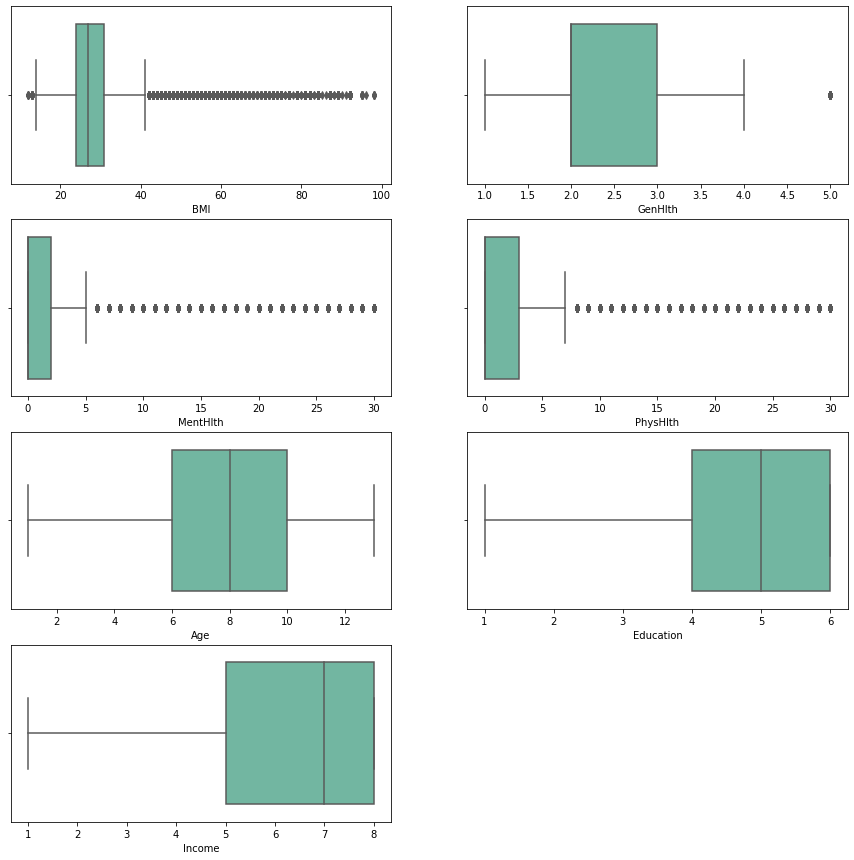

In [10]:
# 4.多数值分布类别Check The Outliers
# 多
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

In [11]:
# 5.Check dublicated data
data.duplicated().sum()

24206

Text(0.5, 1.0, 'correlation of feature')

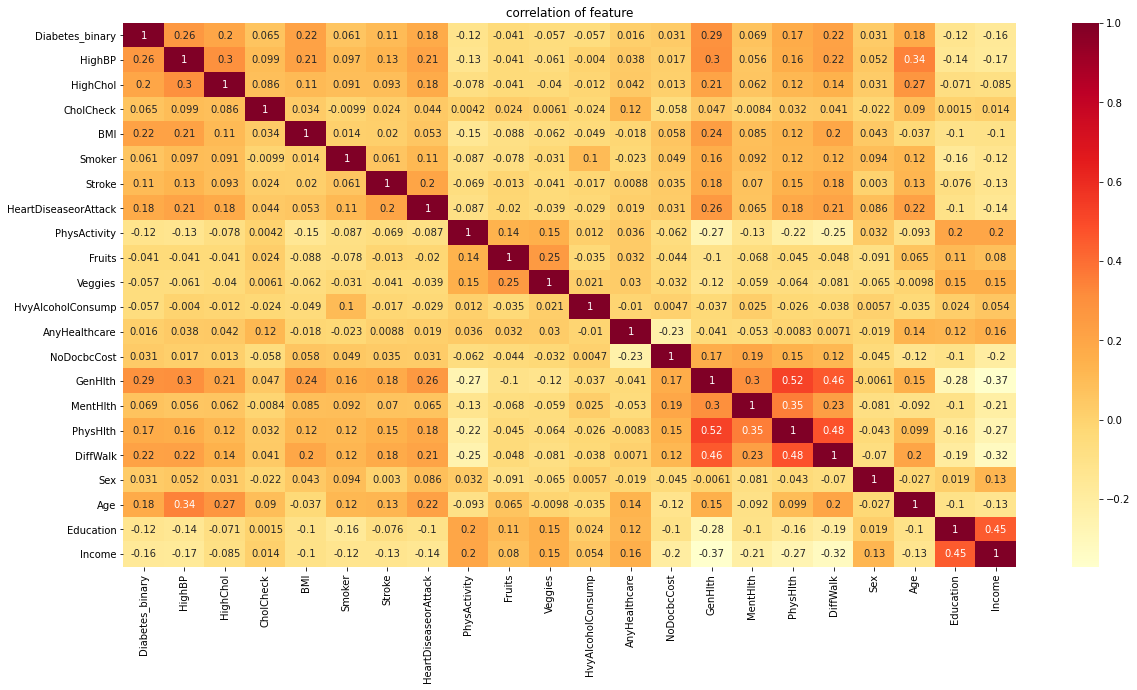

In [12]:
# 6.using heatmap to understand correlation better in dataset data 
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

In [13]:
# 二.预处理 （7-10 ）

In [14]:
# 7. drop dublicated data
data.drop_duplicates(inplace = True)
data.duplicated().sum()
data.shape

(229474, 22)

In [15]:
# 8.Data Splitting
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

In [16]:
# 9.Feature Selections（Chi Square）
#apply SelectKBest class to extract top 16 best features
BestFeatures = SelectKBest(score_func=chi2, k=16)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)              
f_Scores.columns = ['Feature','Score']

print(f_Scores.nlargest(16,'Score'))

                 Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135


In [17]:
# （续）We will use those features in our model "Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" will not be with us
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" ]
data.drop(colomns , axis= 1 ,inplace=True)
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

In [18]:
# 9.Dealing with imbalancing
Y.value_counts()
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)
x_sm,y_sm= nm.fit_resample(X,Y)
y_sm.value_counts()
# 划分训练、测试样本
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

In [19]:
# 10.Data Scalling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [15]:
# 三.建模预测 （11-16 ）

Training set score: 0.8512
Test set score: 0.8472
Mean Squared Error : 0.152808775345458
Root Mean Squared Error : 0.3909076301960068


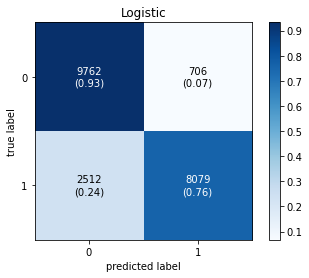

In [29]:
# 11.Logistic
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)
# make predictions on test set
y_pred=lg.predict(X_test)
print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("Logistic")
plt.show()

Training set score: 0.8657
Test set score: 0.8479
Mean Squared Error : 0.15214397644712474
Root Mean Squared Error : 0.39005637598573456


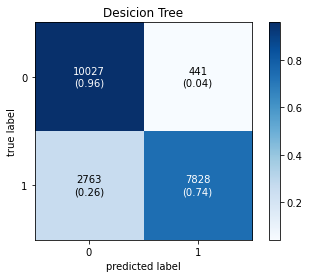

In [30]:
# 12.Desicion Tree 
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)
# make predictions on test set
y_pred=dt.predict(X_test)
print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("Desicion Tree")
plt.show()

Training set score: 0.8423
Test set score: 0.8049
Mean Squared Error : 0.19507099102521488
Root Mean Squared Error : 0.44166841750935154


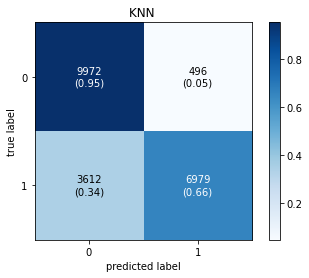

In [31]:
# 13.KNN 
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_train , Y_train)
# make predictions on test set
y_pred=knn.predict(X_test)
print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("KNN ")
plt.show()

Training set score: 0.8713
Test set score: 0.8588
Mean Squared Error : 0.14117479462462604
Root Mean Squared Error : 0.375732344395084


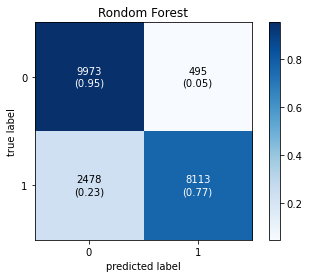

In [32]:
# 14.Rondom Forest 
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )
# fitting the model on the train data
rf.fit(X_train, Y_train)
# make predictions on test set
y_pred=rf.predict(X_test)
print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("Rondom Forest")
plt.show()

Training set score: 0.8687
Test set score: 0.8603
Mean Squared Error : 0.13970273992117385
Root Mean Squared Error : 0.37376829710553816


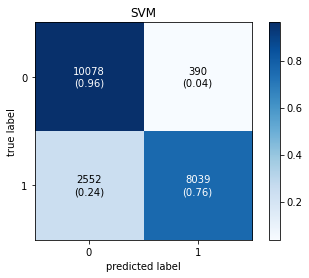

In [34]:
# 15.SVM
from sklearn.svm import SVC
# define the model
clf = SVC(kernel='rbf', C=1.0)
# train the model
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)
print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("SVM")
plt.show()

Training set score: 0.8770
Test set score: 0.8663
Mean Squared Error : 0.13367206420057934
Root Mean Squared Error : 0.3656119038004361


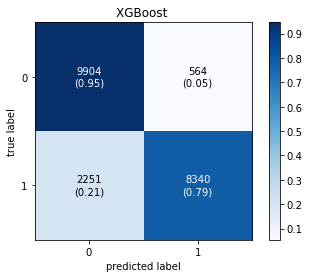

In [33]:
# 16. XGBoost 
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , Y_train)
y_pred=xg.predict(X_test)
print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("XGBoost ")
plt.show()